In [5]:
import os
import json
import urllib
import requests
import datetime as datetime

from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread

In [6]:
url = "https://api.nasa.gov/planetary/apod?api_key=NZcTgk6A0Z9LROxcyFPlFICzr7V9oa7mEIkU9j7a"

r = requests.get(url)

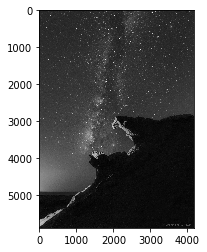

In [17]:
if r:
    img_data = json.loads(r.text)
    img_url = img_data['url']
    img_hd_url = img_data['hdurl']
    img_name = datetime.datetime.now().strftime('%y%m%d%H%M%S') + '.jpg'
    file_path = os.environ['HOME'] + '/Projects/nasa/img/' + img_name
    if (os.path.exists(file_path)) is False:
        try:
            urllib.request.urlretrieve(img_hd_url, filename=file_path)
            img_desc = img_hd_url
        except urllib.error.HTTPError:
            urllib.request.urlretrieve(img_url, filename=file_path)
            img_desc = img_url
        
        from PIL import Image
        import numpy as np

        image = Image.open(file_path).convert("L")
        arr = np.asarray(image)
        plt.imshow(arr, cmap='gray', vmin=0, vmax=255) # turn grayscale so we can do the image processing
        plt.show()

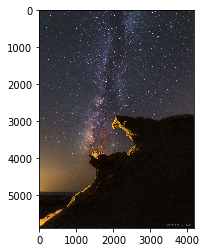

In [23]:
import matplotlib.image as mpimg
img = mpimg.imread(file_path) # read in file path
imgplot = plt.imshow(img) # render
plt.show()

In [18]:
blobs_log = blob_log(arr, max_sigma=30, num_sigma=10, threshold=.1) # Blobs are bright on dark or dark on bright regions in an image
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) # https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html
numrows = len(blobs_log)
print("Number of stars counted : " ,numrows)

Number of stars counted :  18587


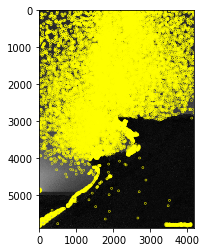

In [22]:
fig, ax = plt.subplots(1, 1)
plt.imshow(arr, cmap='gray')
for blob in blobs_log: # for each start
    y, x, r = blob # get the coordindates
    c = plt.Circle((x, y), r+5, color='yellow', linewidth=2, fill=False) # create a circle on that coordinate
    ax.add_patch(c) # display the circle to the graph
